# KNN - From Scratch

K-Nearest Neighbors (KNN) is a simple yet powerful supervised machine learning algorithm used for classification and regression tasks. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Students Group.xlsx")
df.head()

,SID,Math,Science,Group
0,1,49,42,A
1,2,35,45,A
2,3,44,54,A
3,4,40,54,A
4,5,42,76,A


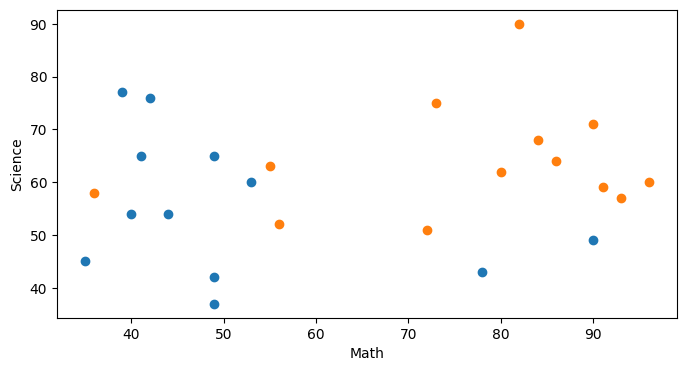

In [3]:
plt.figure(figsize=(8,4))
plt.scatter(df[df["Group"]=="A"]["Math"],df[df["Group"]=="A"]["Science"])
plt.scatter(df[df["Group"]=="B"]["Math"],df[df["Group"]=="B"]["Science"])
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [4]:
new_point = np.random.randint(35,99,2)
new_point

array([91, 52], dtype=int32)

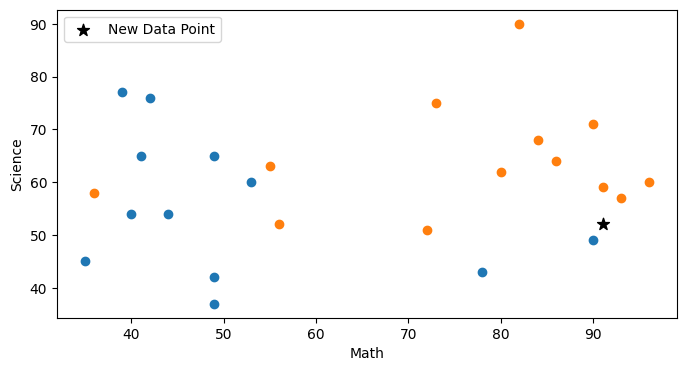

In [5]:
plt.figure(figsize=(8,4))
plt.scatter(df[df["Group"]=="A"]["Math"],df[df["Group"]=="A"]["Science"])
plt.scatter(df[df["Group"]=="B"]["Math"],df[df["Group"]=="B"]["Science"])
plt.scatter(new_point[0],new_point[1],label="New Data Point",color="k",marker="*",s=80)
plt.xlabel("Math")
plt.ylabel("Science")
plt.legend()
plt.show()

In [6]:
distance = np.sqrt(np.square(new_point[0] - df["Math"]) + np.square(new_point[1] - df["Science"]))
distance

0     43.174066
1     56.435804
2     47.042534
3     51.039201
4     54.561891
5     43.965896
6     38.832976
7     15.811388
8     51.662365
9      3.162278
10    57.697487
11    44.598206
12    55.326305
13    39.051248
14    14.866069
15    17.464249
16    37.643060
17    35.000000
18    19.026298
19    13.000000
20     9.433981
21     7.000000
22     5.385165
23    19.026298
24    29.206164
dtype: float64

In [7]:
df["Distance"] = distance

In [8]:
df.head()

,SID,Math,Science,Group,Distance
0,1,49,42,A,43.174066
1,2,35,45,A,56.435804
2,3,44,54,A,47.042534
3,4,40,54,A,51.039201
4,5,42,76,A,54.561891


In [9]:
df.sort_values("Distance").head()

,SID,Math,Science,Group,Distance
9,10,90,49,A,3.162278
22,23,93,57,B,5.385165
21,22,91,59,B,7.000000
20,21,96,60,B,9.433981
19,20,86,64,B,13.000000


In [10]:
df.iloc[np.argsort(distance)[:5]]["Group"].value_counts().index[0]

'B'

* distance:

    * Represents an array of distances between a query point and all the points in the dataset.
    * Usually computed using a distance metric like Euclidean or Manhattan distance.
* np.argsort(distance):

    * Returns the indices that would sort the distance array in ascending order.
    * The first K indices correspond to the nearest neighbors.
* [:5]:

    * Slices the first 5 indices, representing the 5 nearest neighbors (K=5).
* df.iloc[...]:

    * Selects the rows of the DataFrame df corresponding to the nearest neighbors.
* ["Group"]:

    * Accesses the column named Group, which contains the class labels for the data points.
* value_counts():

    * Counts the occurrences of each class among the selected neighbors.
* index[0]:

    * Retrieves the class label (index) with the highest count (majority class).

In [11]:
def predict(new_data_point):
    dist = np.sqrt(np.square(new_data_point[0] - df["Math"]) + np.square(new_data_point[1] - df["Science"]))
    output = df.iloc[np.argsort(dist)[:5]]["Group"].value_counts().index[0]
    return f"New Student belongs to {output} group"

In [12]:
predict([89,58])

'New Student belongs to B group'

In [13]:
predict([41,39])

'New Student belongs to A group'

In [14]:
predict([88,45])

'New Student belongs to B group'

In [15]:
predict([77,42])

'New Student belongs to B group'